In [26]:
# Dependencies
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Import scraped data
df = pd.read_csv('fires.csv')
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
0,2012,C10075 (2012),Cariboo,52 44.747,124 22.619,Bald Face Mountain,"July 14, 2012",13.0
1,2012,C10118 (2012),Cariboo,52 41.849,123 00.607,Quesnel-Merston Creek,"July 19, 2012",6.0
2,2012,C10247 (2012),Cariboo,53 03.159,122 58.020,11B Road Blackwater,"October 17, 2012",20.0
3,2012,C10250 (2012),Cariboo,52 30.773,122 26.629,Margeurite,"March 30, 2013",8.0
4,2012,C20005 (2012),Cariboo,52 07.676,121 54.904,150 Mile House-330 Valley Rd,"April 7, 2012",12.2


In [15]:
# Extract month from date
df['Discovery Date'] = pd.to_datetime(df['Discovery Date'])
df['month'] = df['Discovery Date'].apply(lambda date: date.month)
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha),month
0,2012,C10075 (2012),Cariboo,52 44.747,124 22.619,Bald Face Mountain,2012-07-14,13.0,7
1,2012,C10118 (2012),Cariboo,52 41.849,123 00.607,Quesnel-Merston Creek,2012-07-19,6.0,7
2,2012,C10247 (2012),Cariboo,53 03.159,122 58.020,11B Road Blackwater,2012-10-17,20.0,10
3,2012,C10250 (2012),Cariboo,52 30.773,122 26.629,Margeurite,2013-03-30,8.0,3
4,2012,C20005 (2012),Cariboo,52 07.676,121 54.904,150 Mile House-330 Valley Rd,2012-04-07,12.2,4


In [16]:
# Create function to convert lat and long from DDM to DD 
def todd(ddm):
    
    degrees = ddm.str.split(' ').str[0].astype(int)
    minutes = ddm.str.split(' ').str[1].astype(float)
    dd= degrees + (minutes/60)
    
    return dd

In [17]:
df['Latitude'] = todd(df['Latitude'])
df['Longitude'] = todd(df['Longitude'])*-1 # Multiply longitude by -1 because this is in the western hemisphere
df.head()

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha),month
0,2012,C10075 (2012),Cariboo,52.745783,-124.376983,Bald Face Mountain,2012-07-14,13.0,7
1,2012,C10118 (2012),Cariboo,52.697483,-123.010117,Quesnel-Merston Creek,2012-07-19,6.0,7
2,2012,C10247 (2012),Cariboo,53.052650,-122.967000,11B Road Blackwater,2012-10-17,20.0,10
3,2012,C10250 (2012),Cariboo,52.512883,-122.443817,Margeurite,2013-03-30,8.0,3
4,2012,C20005 (2012),Cariboo,52.127933,-121.915067,150 Mile House-330 Valley Rd,2012-04-07,12.2,4


In [18]:
# Remove columns that we aren't going to use in our model
# Fire Centre is a region so we are removing it because it will likely cause multicolinearity issues with long and lat
df.drop(['Fire Number','Fire Centre','Geographic','Discovery Date'], axis=1, inplace=True)
df.columns = ['year','lat','long','ha','month']
df.head()

,year,lat,long,ha,month
0,2012,52.745783,-124.376983,13.0,7
1,2012,52.697483,-123.010117,6.0,7
2,2012,53.052650,-122.967000,20.0,10
3,2012,52.512883,-122.443817,8.0,3
4,2012,52.127933,-121.915067,12.2,4


<AxesSubplot:>

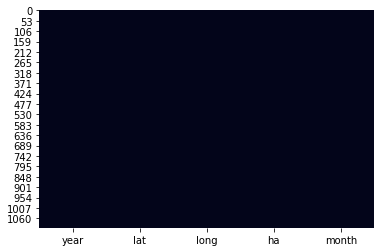

In [19]:
# Check for null values (if there are no null values the plot will be all black)
sns.heatmap(df.isnull(), cbar=False)

In [20]:
# Get summary stats
df.describe()

,year,lat,long,ha,month
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,2014.527076,53.062451,-121.563655,1880.844005,6.659747
std,1.718224,3.378291,3.122891,18986.542475,1.770664
min,2012.000000,48.388617,-134.021017,5.000000,2.000000
25%,2013.000000,50.172067,-123.229396,10.000000,5.000000
50%,2015.000000,52.107367,-121.362083,26.650000,7.000000
75%,2016.000000,55.794308,-119.868037,155.325000,8.000000
max,2017.000000,59.980067,-114.302483,521012.000000,11.000000


<AxesSubplot:xlabel='ha'>

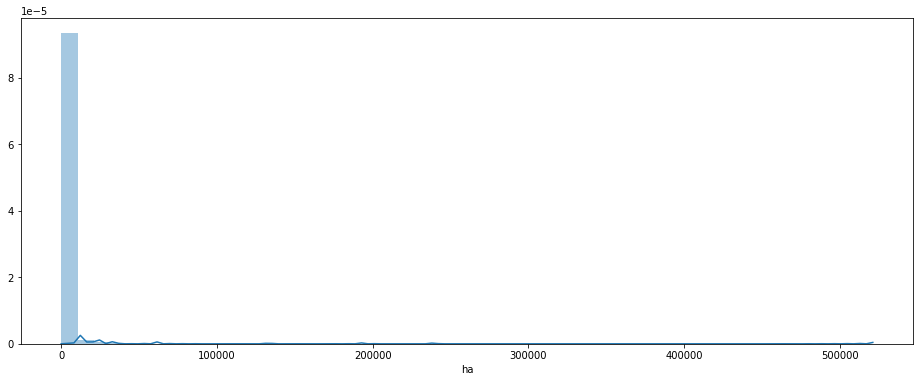

In [21]:
# The average size fire is 1108 hectares (ha), but there are some as big as 521012 ha
plt.figure(figsize=(16,6))
sns.distplot(df['ha'])

In [22]:
# Distribution above is right skewed so we will transform the values
df['ha'].skew()

21.558038647949687

In [25]:
# Try different transformation methods
print('log: ', np.log(df['ha']).skew())
print('square root: ', np.sqrt(df['ha']).skew())
ha_boxcox = stats.boxcox(df['ha'])[0]
print('box-cox: ', pd.Series(ha_boxcox).skew())

log:  1.2239134215686043
square root:  9.131615432787527
box-cox:  0.2499913222099682


In [27]:
# The box-cox transformation is the most effective in reducing skew
ha_boxcox,fitted_lambda= stats.boxcox(df['ha'],lmbda=None)
df['ha'] = pd.Series(ha_boxcox)
# inv_boxcox(y,fitted_lambda)

<AxesSubplot:xlabel='ha'>

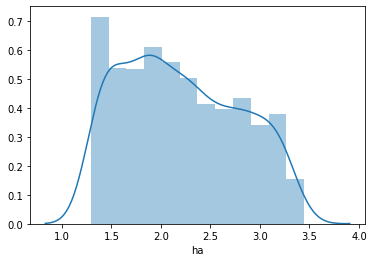

In [34]:
# Distribution looks much better
sns.distplot(df['ha'])

<AxesSubplot:xlabel='long', ylabel='lat'>

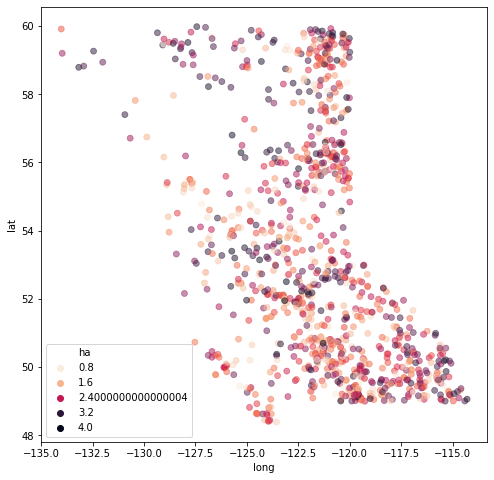

In [33]:
# Plotting lat and long takes shape of British Columbia and shows hotspots for fires
# https://www.google.com/maps/place/British+Columbia,+Canada/
plt.figure(figsize=(8,8))
sns.scatterplot('long','lat',data=df,hue='ha',edgecolor=None, alpha=0.5, palette='rocket_r')